# Tutorial
This notebook follows the instructions at the README file and showcases how the repository should be used

## Start Ray
First, we need to initiate the ray. You can do
1. run `ray start --head`  in a terminal, or
2. Run :
   ```
   import ray
   ray.init()
   ```
   as in the next cell

In [1]:
import ray
ray.init()

2024-03-07 23:38:37,580	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.8
Ray version:,2.1.0
Dashboard:,http://127.0.0.1:8265


## Run the code

After starting the ray, we run the code with one of the config files in the `configs/` directory using the command in the next cell. Each config file is associated with a different experiment in the paper.

In this tutorial we use `configs/5-1-noncontextual-3-products-short.json` which is a shorter version of the experiment discussed in Section 5.1 of the paper: Motivating Price and Promotion Exploration. In the paper, we use 50000 time steps, but this shorter version uses a time horizon of 5000 steps. We also do 10 repetitions instead of 40.

In [ ]:
!python main.py --config configs/5-1-noncontextual-3-products-short.json

## Outputs
The code will output the results of the experiment in the `results/` directory. The results are saved in a directory with the name in the following format `{exp_name}_rep{repeat}_T{max_T}`, where `exp_name`, `repeat`, and `max_T` are the name of the experiment, number of repetitions, and the time horizon defined in the config file, respectively. The results directory for each experiment contains the following files:
- config.json: a copy of the config file used for the experiment
- regret.csv: a csv file containing the regrets of each method at each time step
- context_history.csv: a csv file containing the context history of the experiment (only for contextual environments)
- price_history.csv: a csv file containing the history of selected price by each method
- x_history.csv: a csv file containing the history of selected promotion by each method
- choice_history.csv: a csv file containing the history of choices sampled from the choice model
- demand_history.csv: a csv file containing the history of expected demand from the choice model
- times.csv: a csv file containing the time taken by each method to complete

# Plots

The code in `generate_paper_plots.py` can be used to generate the plots in the paper. The plots are saved in the `results/paper_plots/` directory. You can run the file and determining which experiment you want to run by running the following command in the terminal:
```
python generate_paper_plots.py -experiment {experiment_name}
```
where `{experiment_name}` is the name of the experiment you want to generate the plots for. The name of the experiments can be found in the `experiment_map` dictionary in the `generate_paper_plots.py` file.

Alternatively, you can import the `generate_paper_plots` module and use the functions to generate plots for a specific experiment.

Below, we show how to run the code and generate the plots for the experiment `5-1-noncontextual-3-products-short`, that we are using in this tutorial. The code will generate plots similar to plots found in Figure 2 of the paper. The first set of plots show cumulative regret, simple regret, and percentage of optimal reveneu achived by each method. Additionaly, the code will generate plots showing the distribution of prices and promotions selected by each method at different time periods in the experiment.

In [3]:
from generate_paper_plots import *

['TS-Laplace-Batch-10-lr0.0001' 'Greedy-Batch-10-lr0.0001']
Saved plot to results/paper_plots/5-1-noncontextual-3-products_3_rep10_T5000.png


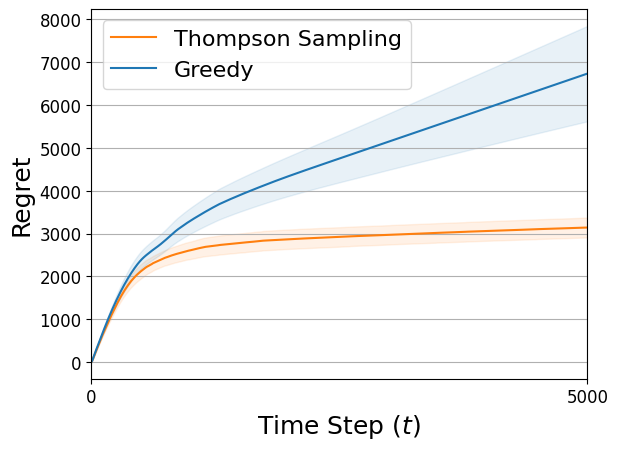

Saved plot to results/paper_plots/simpleregret_5-1-noncontextual-3-products_3_rep10_T5000.png


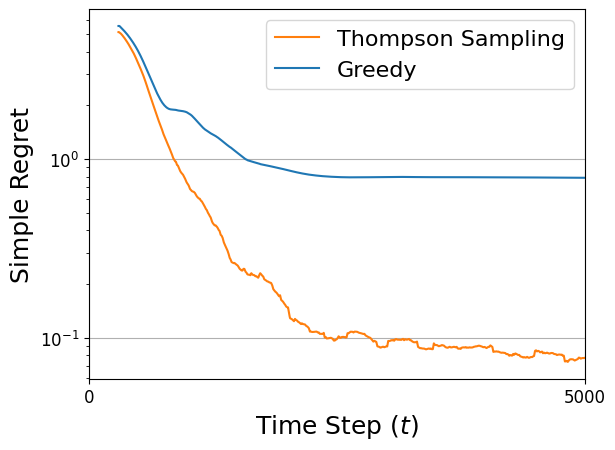

Saved plot to results/paper_plots/paper_plot_percentage_5-1-noncontextual-3-products_3_rep10_T5000.png


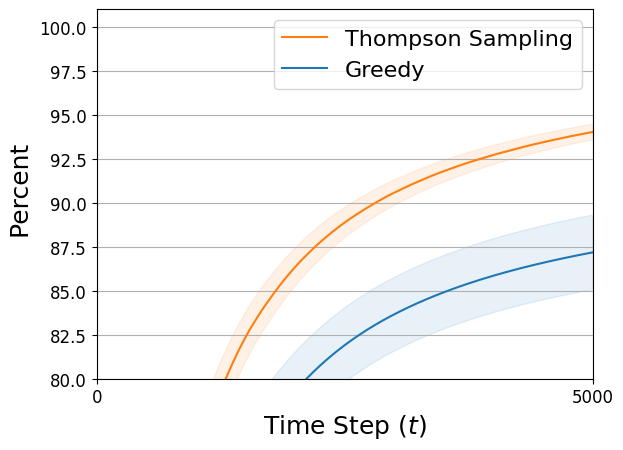

Saved plot to results/paper_plots/5-1-noncontextual-3-products-prices-0-1000.png


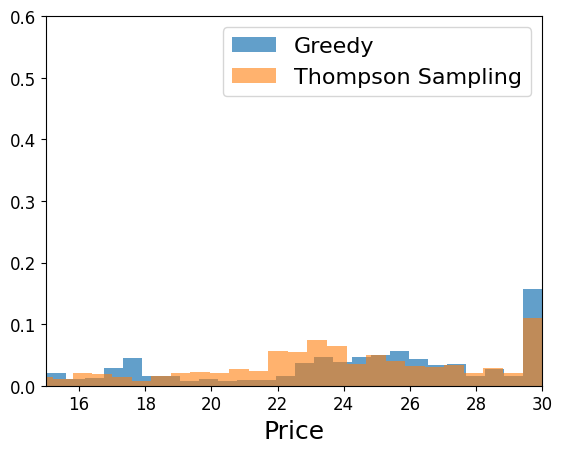

Saved plot to results/paper_plots/5-1-noncontextual-3-products-prices-1000-2000.png


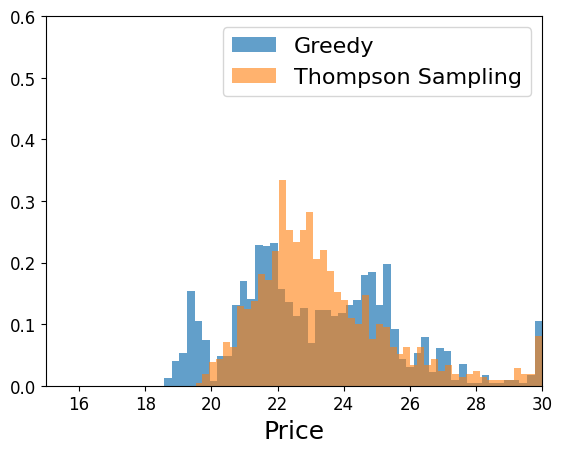

Saved plot to results/paper_plots/5-1-noncontextual-3-products-prices-4000-5000.png


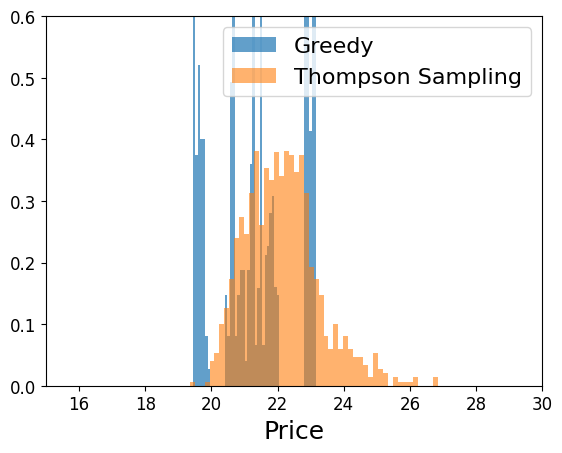

Saved plot to results/paper_plots/5-1-noncontextual-3-products-promotions-0-1000.png


<Figure size 640x480 with 0 Axes>

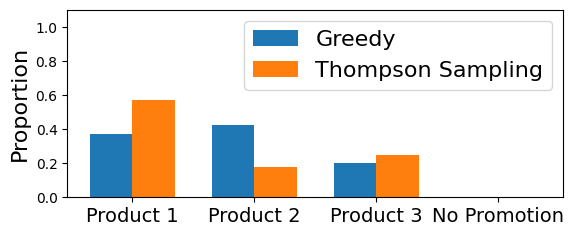

Saved plot to results/paper_plots/5-1-noncontextual-3-products-promotions-1000-2000.png


<Figure size 640x480 with 0 Axes>

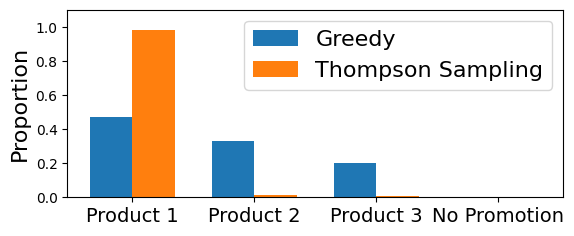

Saved plot to results/paper_plots/5-1-noncontextual-3-products-promotions-4000-5000.png


<Figure size 640x480 with 0 Axes>

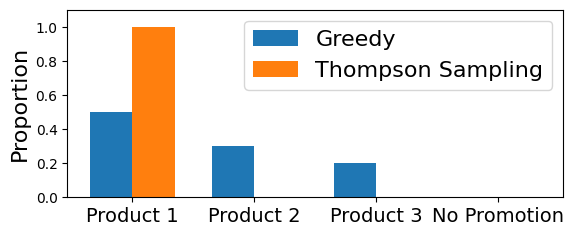

<Figure size 640x480 with 0 Axes>

In [4]:
plots_5_1_noncontextual_3_products(5000, "results", segments=[(0, 1000), (1000, 2000), (4000, 5000)], rep=10)